In [68]:
import pandas as pd
import gensim
import time
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from gensim.models.phrases import Phrases, ENGLISH_CONNECTOR_WORDS
import numpy as np
from sklearn.model_selection import train_test_split
from gensim.models.coherencemodel import CoherenceModel
import os
from gensim.test.utils import datapath
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [41]:
def train(country="China", timestamp="2021", test_size=0.2, no_iterations=50, min_topic=40, max_topic=100):
    # read data
    data_file = "Data/Timestamp/" + country + "_" + timestamp + ".txt"
    with open(data_file) as file:
        lines = file.readlines()
    print("Read data from path: " + data_file)
    
    # tokenize
    corpus = [list(gensim.utils.tokenize(line, deacc = True)) for line in lines]
    
    # get corpus
    corpus = pd.DataFrame({'reviews': corpus})
    docs = corpus['reviews']
    
    # # train test split
    # train, test = train_test_split(corpus, test_size=test_size)
    # docs, docs_train, docs_test = corpus['reviews'], train['reviews'], test['reviews']
    
    # vocabulary / dictionary
    dictionary = gensim.corpora.Dictionary(docs)
    
    # BOW
    bow = [dictionary.doc2bow(doc) for doc in docs]
    # bow_train = [dictionary.doc2bow(doc) for doc in docs_train]
    # bow_test = [dictionary.doc2bow(doc) for doc in docs_test]
    
    # tfidf
    tfidf = gensim.models.TfidfModel(bow)
    # tfidf_train = gensim.models.TfidfModel(bow_train)
    # tfidf_test = gensim.models.TfidfModel(bow_test)

    tfidf = tfidf[bow]
    # tfidf_train = tfidf_train[bow_train]
    # tfidf_test = tfidf_test[bow_test]
    
    # set up file for saving data
    file_name_umass = "Data/Result_timestamp/" + country + "_" + timestamp + "_" + str(no_iterations) +"_result_umass.csv"
    file_name_perplexity = "Data/Result_timestamp/" + country + "_" + timestamp + "_" + str(no_iterations) +"_result_perplexity.csv"
    # file_name_perplexity_train = "Data/Result_timestamp/" + country + "_" + timestamp + "_" + str(no_iterations) +"_result_perplexity_train.csv"
    # file_name_perplexity_test = "Data/Result_timestamp/" + country + "_" + timestamp + "_" + str(no_iterations) +"_result_perplexity_test.csv"

    file_write_umass = open(file_name_umass, "a")
    file_write_perplexity = open(file_name_perplexity, "a")
    # file_write_perplexity_train = open(file_name_perplexity_train, "a")
    # file_write_perplexity_test = open(file_name_perplexity_test, "a")

    for no_topics in range(min_topic,max_topic + 1):

        start = time.time()
        lda_model_tfidf = gensim.models.LdaModel(tfidf, 
                                                 num_topics=no_topics, 
                                                 id2word = dictionary, 
                                                 passes = 2,
                                                 iterations= no_iterations)
        end = time.time()
        
        # save umass result
        u_mass = CoherenceModel(model=lda_model_tfidf, corpus=bow, dictionary=dictionary ,coherence='u_mass', topn=20)
        u_mass_res = u_mass.get_coherence() 

        # save perplexity result
        perplexity = lda_model_tfidf.log_perplexity(tfidf, len(docs))
        # perplexity_train = lda_model_tfidf.log_perplexity(tfidf_train, len(docs_train))
        # perplexity_test = lda_model_tfidf.log_perplexity(tfidf_test, len(docs_test))
        
        # store data to file
        file_write_umass.write(str(no_topics) + "," + str(u_mass_res) +","+str(end-start)+"\n")
        file_write_perplexity.write(str(no_topics) + "," + str(perplexity) +","+str(end - start)+"\n")
        # file_write_perplexity_train.write(str(no_topics) + "," + str(perplexity_train) +","+str(end - start)+"\n")
        # file_write_perplexity_test.write(str(no_topics) + "," + str(perplexity_test) +","+str(end - start)+"\n")

    file_write_umass.close()
    file_write_perplexity.close()
    # file_write_perplexity_train.close()
    # file_write_perplexity_test.close()

In [ ]:
COUNTRY = ["China", "France", "Germany", "Japan", "Korea", "Vietnam"]
TIMESTAMP = ["pre2018", "2018", "2019", "2020", "2021"]

## Train

In [18]:
for country in COUNTRY:
    for timestamp in TIMESTAMP:
        train(country=country, timestamp=timestamp, test_size=0.2, no_iterations=50, min_topic=40, max_topic=100)

Read data from path: Data/Timestamp/China_pre2018.txt
Read data from path: Data/Timestamp/China_2018.txt
Read data from path: Data/Timestamp/China_2019.txt
Read data from path: Data/Timestamp/China_2020.txt
Read data from path: Data/Timestamp/China_2021.txt
Read data from path: Data/Timestamp/France_pre2018.txt
Read data from path: Data/Timestamp/France_2018.txt
Read data from path: Data/Timestamp/France_2019.txt
Read data from path: Data/Timestamp/France_2020.txt
Read data from path: Data/Timestamp/France_2021.txt
Read data from path: Data/Timestamp/Germany_pre2018.txt
Read data from path: Data/Timestamp/Germany_2018.txt
Read data from path: Data/Timestamp/Germany_2019.txt
Read data from path: Data/Timestamp/Germany_2020.txt
Read data from path: Data/Timestamp/Germany_2021.txt
Read data from path: Data/Timestamp/Japan_pre2018.txt
Read data from path: Data/Timestamp/Japan_2018.txt
Read data from path: Data/Timestamp/Japan_2019.txt
Read data from path: Data/Timestamp/Japan_2020.txt
Read

## Save model

In [63]:
def save_model(topic_data, country="China", timestamp="2021", no_iterations=50, test_size=0.2):
    # read data
    data_file = "Data/Timestamp/" + country + "_" + timestamp + ".txt"
    with open(data_file) as file:
        lines = file.readlines()
    print("Read data from path: " + data_file)
    
    # tokenize
    corpus = [list(gensim.utils.tokenize(line, deacc = True)) for line in lines]
    
    # get corpus
    corpus = pd.DataFrame({'reviews': corpus})
    docs = corpus['reviews']
    
    # # train test split
    train, test = train_test_split(corpus, test_size=test_size)
    docs, docs_train, docs_test = corpus['reviews'], train['reviews'], test['reviews']
    
    # vocabulary / dictionary
    dictionary = gensim.corpora.Dictionary(docs)
    
    # BOW
    bow = [dictionary.doc2bow(doc) for doc in docs]
    bow_train = [dictionary.doc2bow(doc) for doc in docs_train]
    bow_test = [dictionary.doc2bow(doc) for doc in docs_test]
    
    # tfidf
    tfidf = gensim.models.TfidfModel(bow)
    tfidf_train = gensim.models.TfidfModel(bow_train)
    tfidf_test = gensim.models.TfidfModel(bow_test)

    tfidf = tfidf[bow]
    tfidf_train = tfidf_train[bow_train]
    tfidf_test = tfidf_test[bow_test]
    
    # number of topics
    file_id = "Data/Result_timestamp old/" + country + "_" + timestamp + "_" + str(no_iterations) +"_result_umass.csv"

    # find topic
    row = topic_data.loc[topic_data["file"] == file_id]
    no_topics = row["topic"]
    
    lda_model_tfidf = gensim.models.LdaModel(tfidf_train, 
                                             num_topics=no_topics, 
                                             id2word = dictionary, 
                                             passes = 2,
                                            iterations= no_iterations)
    
    directory = "Data/Models/Timestamp_train/" + country + "_" + timestamp
    file_model = directory  + "/" + country + "_" + timestamp
    if not os.path.exists(directory):
        os.makedirs(directory)

    lda_model_tfidf.save(file_model)
    print("Save model to path: " + directory)

In [64]:
topic_data = pd.read_csv('topic_timestamp_train.txt',delimiter=',')
for country in COUNTRY:
    for timestamp in TIMESTAMP:
        save_model(topic_data=topic_data, country=country, timestamp=timestamp, no_iterations=50)

Read data from path: Data/Timestamp/China_pre2018.txt
File id: Data/Result_timestamp old/China_pre2018_50_result_umass.csv
Save model to path: Data/Models/Timestamp_train/China_pre2018
Read data from path: Data/Timestamp/China_2018.txt
File id: Data/Result_timestamp old/China_2018_50_result_umass.csv
Save model to path: Data/Models/Timestamp_train/China_2018
Read data from path: Data/Timestamp/China_2019.txt
File id: Data/Result_timestamp old/China_2019_50_result_umass.csv
Save model to path: Data/Models/Timestamp_train/China_2019
Read data from path: Data/Timestamp/China_2020.txt
File id: Data/Result_timestamp old/China_2020_50_result_umass.csv
Save model to path: Data/Models/Timestamp_train/China_2020
Read data from path: Data/Timestamp/China_2021.txt
File id: Data/Result_timestamp old/China_2021_50_result_umass.csv
Save model to path: Data/Models/Timestamp_train/China_2021
Read data from path: Data/Timestamp/France_pre2018.txt
File id: Data/Result_timestamp old/France_pre2018_50_res

In [65]:
x = 1
x

1

In [189]:
start = time.time()
lda_model_tfidf = gensim.models.LdaModel(tfidf_train, 
                                             num_topics=90, 
                                             id2word = dictionary, 
                                             passes = 2,
                                            iterations= 50)
end = time.time()
print("Number of topics: " + str(90))
print("Processing time: %fs" % (end - start))

# Umass
umass_train = CoherenceModel(model=lda_model_tfidf, corpus=bow_train, dictionary=dictionary ,coherence='u_mass', topn=20)
umass_train = umass_train.get_coherence() 
umass_test = CoherenceModel(model=lda_model_tfidf, corpus=bow_test, dictionary=dictionary ,coherence='u_mass', topn=20)
umass_test = umass_test.get_coherence() 
umass = CoherenceModel(model=lda_model_tfidf, corpus=bow, dictionary=dictionary ,coherence='u_mass', topn=20)
umass = umass.get_coherence() 
print("Traininng Umass: " + str(umass_train))
print("Test Umass: " + str(umass_test))
print("Umass: " + str(umass))

# Perplexity
perplexity_train = lda_model_tfidf.log_perplexity(tfidf_train, len(docs_train))
perplexity_test = lda_model_tfidf.log_perplexity(tfidf_test, len(docs_test))
perplexity = lda_model_tfidf.log_perplexity(tfidf, len(docs))

print("Training Perplexity: " + str(perplexity_train))
print("Test Perplexity: " + str(perplexity_test))
print("Perplexity: " + str(perplexity))

Number of topics: 90
Processing time: 6.701421s
Traininng Umass: -6.302999646289072
Test Umass: -11.775847867810231
Umass: -7.130871316280784
Training Perplexity: -32.324217775068355
Test Perplexity: -33.63437110004962
Perplexity: -31.840227391712464


In [190]:
for idx, topic in lda_model_tfidf.print_topics(-1):
    print("Topic: {} Word: {}".format(idx, topic))
    print("\n")

Topic: 0 Word: 0.011*"place" + 0.010*"nice" + 0.010*"great" + 0.009*"visit" + 0.009*"park" + 0.009*"see" + 0.009*"time" + 0.009*"day" + 0.008*"walk" + 0.008*"good"


Topic: 1 Word: 0.066*"shenzhen" + 0.051*"entry" + 0.048*"landmark" + 0.037*"mandarin" + 0.026*"stall" + 0.025*"hire" + 0.020*"reasonably" + 0.017*"venue" + 0.016*"funny" + 0.013*"uneven"


Topic: 2 Word: 0.000*"justifies" + 0.000*"trill" + 0.000*"fumigated" + 0.000*"powdered" + 0.000*"creamer" + 0.000*"clinical" + 0.000*"troble" + 0.000*"jeff" + 0.000*"forbes" + 0.000*"pungent"


Topic: 3 Word: 0.056*"jump" + 0.053*"wow" + 0.045*"deck" + 0.040*"skywalk" + 0.038*"bungy" + 0.033*"sky" + 0.030*"observation" + 0.028*"highest" + 0.026*"memory" + 0.023*"provide"


Topic: 4 Word: 0.000*"justifies" + 0.000*"trill" + 0.000*"fumigated" + 0.000*"powdered" + 0.000*"creamer" + 0.000*"clinical" + 0.000*"troble" + 0.000*"jeff" + 0.000*"forbes" + 0.000*"pungent"


Topic: 5 Word: 0.150*"lake" + 0.049*"boat" + 0.045*"enjoying" + 0.044*"hang

In [191]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(lda_model_tfidf, tfidf, dictionary, mds='tsne')

/Users/thuytdv/miniforge3/envs/PycharmProjects/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(
/Users/thuytdv/miniforge3/envs/PycharmProjects/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/thuytdv/miniforge3/envs/PycharmProjects/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/thuytdv/miniforge3/envs/PycharmProjects/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alte

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
0      87.762489 -37.025394       1        1  32.403132
67     89.462936 -28.521799       2        1   8.066436
34     96.393227 -33.459152       3        1   6.248337
89     60.088821   2.200251       4        1   2.459209
24     67.177612 -29.408293       5        1   2.434424
...          ...        ...     ...      ...        ...
42     12.759281 -10.957397      86        1   0.232353
48      8.771267  24.603121      87        1   0.232353
60     20.928379   4.796843      88        1   0.232353
62     12.177616   7.989081      89        1   0.232353
47      4.201797  -3.632246      90        1   0.232353

[90 rows x 5 columns], topic_info=            Term        Freq       Total Category  logprob  loglift
2602      garden  286.000000  286.000000  Default  30.0000  30.0000
3265       panda  210.000000  210.000000  Default  29.0000  29.0000
2853        lake  158.000000  158.000000  Default  28.0000  28.0000
255     mountain  178.000000  178.000000  Default  27.0000  27.0000
44           car  204.000000  204.000000  Default  26.0000  26.0000
...          ...         ...         ...      ...      ...      ...
24          ping    0.009232   25.318425  Topic90  -9.9274  -1.8519
26        pretty    0.009232   91.059085  Topic90  -9.9274  -3.1319
27         quiet    0.009232   53.026590  Topic90  -9.9274  -2.5912
28        really    0.009232  208.367669  Topic90  -9.9274  -3.9597
29    renovation    0.009232   17.963576  Topic90  -9.9274  -1.5087

[4165 rows x 6 columns], token_table=       Topic      Freq        Term
term                              
1460      47  0.876591           a
3021       9  0.760339        abit
2530      33  0.849400    absolute
37         2  0.625597  absolutely
37        27  0.363250  absolutely
...      ...       ...         ...
9121      35  0.690490       zheng
10390     20  0.841729         zjj
3271       1  0.896594         zoo
3271      29  0.079697         zoo
14358     15  0.777550      zumiao

[4001 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 68, 35, 90, 25, 72, 27, 66, 46, 71, 76, 20, 22, 39, 88, 26, 60, 83, 11, 9, 58, 74, 59, 54, 24, 80, 62, 13, 82, 40, 4, 50, 87, 16, 32, 6, 57, 77, 51, 2, 47, 41, 89, 31, 52, 45, 44, 67, 85, 21, 33, 56, 55, 69, 65, 37, 12, 7, 75, 38, 70, 86, 19, 30, 10, 64, 81, 8, 53, 84, 78, 79, 5, 73, 29, 14, 15, 17, 18, 23, 28, 34, 3, 36, 42, 43, 49, 61, 63, 48])

In [73]:
def save_output(topic_data, country="China", timestamp="2021", no_iterations=50, test_size=0.2):
    # read data
    data_file = "Data/Timestamp/" + country + "_" + timestamp + ".txt"
    with open(data_file) as file:
        lines = file.readlines()
    print("Read data from path: " + data_file)
    
    # tokenize
    corpus = [list(gensim.utils.tokenize(line, deacc = True)) for line in lines]
    
    # get corpus
    corpus = pd.DataFrame({'reviews': corpus})
    docs = corpus['reviews']
    
    # # train test split
    train, test = train_test_split(corpus, test_size=test_size)
    docs, docs_train, docs_test = corpus['reviews'], train['reviews'], test['reviews']
    
    # vocabulary / dictionary
    dictionary = gensim.corpora.Dictionary(docs)
    
    # BOW
    bow = [dictionary.doc2bow(doc) for doc in docs]
    bow_train = [dictionary.doc2bow(doc) for doc in docs_train]
    bow_test = [dictionary.doc2bow(doc) for doc in docs_test]
    
    # tfidf
    tfidf = gensim.models.TfidfModel(bow)
    tfidf_train = gensim.models.TfidfModel(bow_train)
    tfidf_test = gensim.models.TfidfModel(bow_test)

    tfidf = tfidf[bow]
    tfidf_train = tfidf_train[bow_train]
    tfidf_test = tfidf_test[bow_test]
    
    # number of topics
    file_id = "Data/Result_timestamp/" + country + "_" + timestamp + "_" + str(no_iterations) +"_result_umass.csv"

    # find topic
    row = topic_data.loc[topic_data["file"] == file_id]
    no_topics = row["topic"]
    
    lda_model_tfidf = gensim.models.LdaModel(tfidf, 
                                             num_topics=no_topics, 
                                             id2word = dictionary, 
                                             passes = 2,
                                            iterations= no_iterations)
    
    directory = "Data/Output/Timestamp/" + country + "_" + timestamp
    file_output = directory  + "/" + country + "_" + timestamp
    if not os.path.exists(directory):
        os.makedirs(directory)

    # plot and save
    
    plt.figure()
    for t in range(lda_model_tfidf.num_topics):
        plt.imshow(WordCloud(background_color='white', colormap='Oranges').fit_words(dict(lda_model_tfidf.show_topic(t, 200))))
        plt.axis("off")
        plt.title("Topic #" + str(t))
        plt.savefig(file_output + "_topic_" + str(t))
        plt.clf()

In [74]:
topic_data = pd.read_csv('topic_timestamp.txt',delimiter=',')
for country in COUNTRY:
    for timestamp in TIMESTAMP:
        save_output(topic_data=topic_data, country=country, timestamp=timestamp, no_iterations=50)

Read data from path: Data/Timestamp/China_pre2018.txt
Read data from path: Data/Timestamp/China_2018.txt
Read data from path: Data/Timestamp/China_2019.txt
Read data from path: Data/Timestamp/China_2020.txt
Read data from path: Data/Timestamp/China_2021.txt
Read data from path: Data/Timestamp/France_pre2018.txt
Read data from path: Data/Timestamp/France_2018.txt
Read data from path: Data/Timestamp/France_2019.txt
Read data from path: Data/Timestamp/France_2020.txt
Read data from path: Data/Timestamp/France_2021.txt
Read data from path: Data/Timestamp/Germany_pre2018.txt
Read data from path: Data/Timestamp/Germany_2018.txt
Read data from path: Data/Timestamp/Germany_2019.txt
Read data from path: Data/Timestamp/Germany_2020.txt
Read data from path: Data/Timestamp/Germany_2021.txt
Read data from path: Data/Timestamp/Japan_pre2018.txt
Read data from path: Data/Timestamp/Japan_2018.txt
Read data from path: Data/Timestamp/Japan_2019.txt
Read data from path: Data/Timestamp/Japan_2020.txt
Read

/var/folders/8q/s662r9f93lzgt_9plw_3_ymm0000gn/T/ipykernel_11516/775357703.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


Read data from path: Data/Timestamp/Korea_2018.txt
Read data from path: Data/Timestamp/Korea_2019.txt
Read data from path: Data/Timestamp/Korea_2020.txt
Read data from path: Data/Timestamp/Korea_2021.txt
Read data from path: Data/Timestamp/Vietnam_pre2018.txt
Read data from path: Data/Timestamp/Vietnam_2018.txt
Read data from path: Data/Timestamp/Vietnam_2019.txt
Read data from path: Data/Timestamp/Vietnam_2020.txt
Read data from path: Data/Timestamp/Vietnam_2021.txt


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

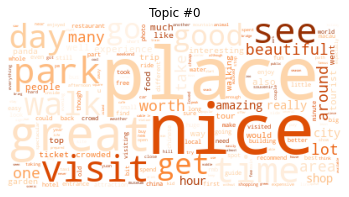

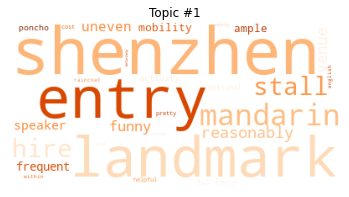

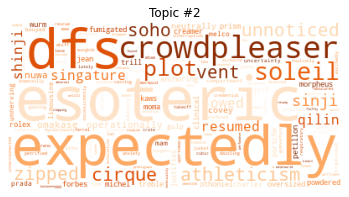

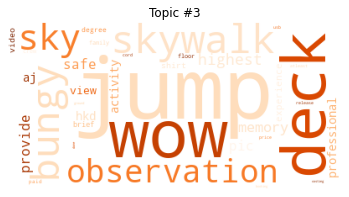

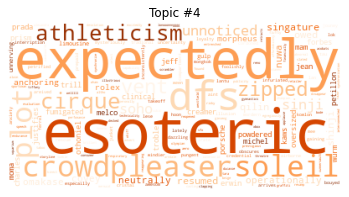

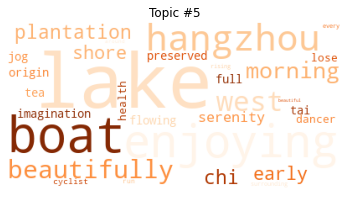

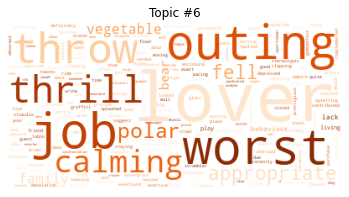

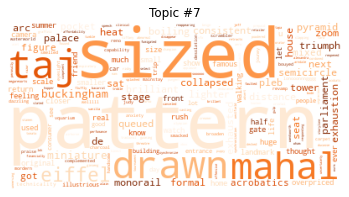

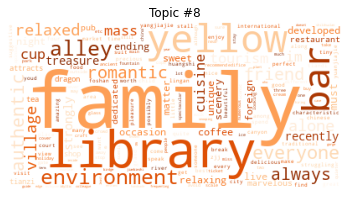

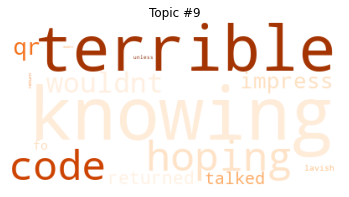

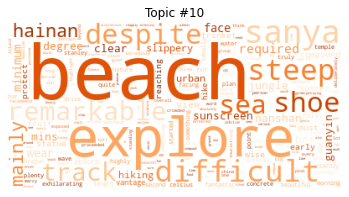

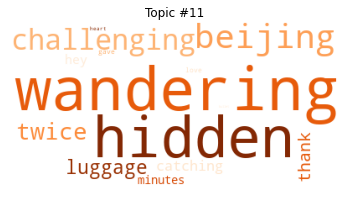

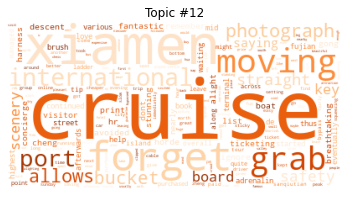

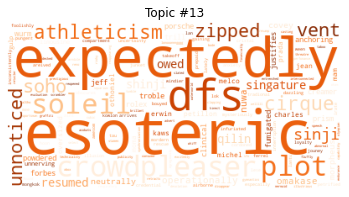

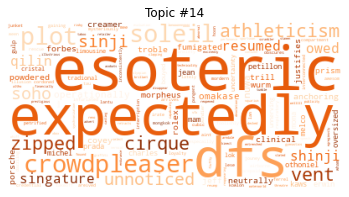

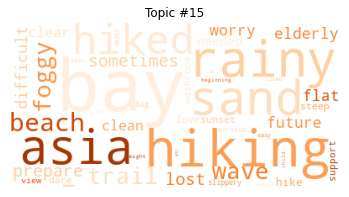

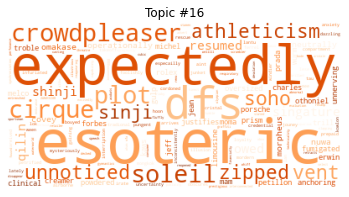

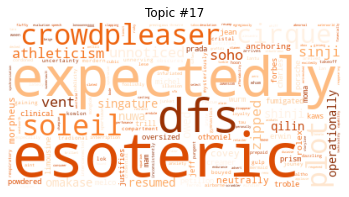

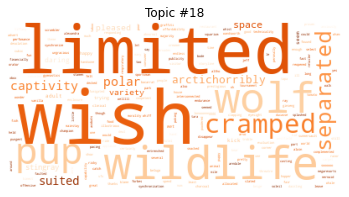

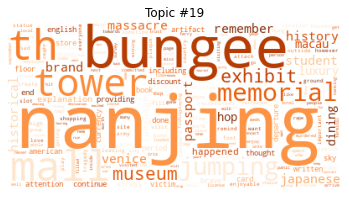

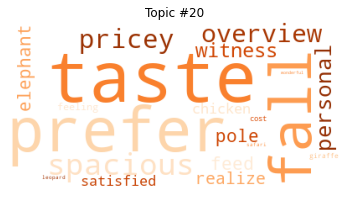

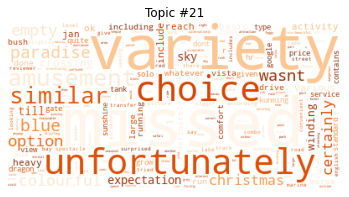

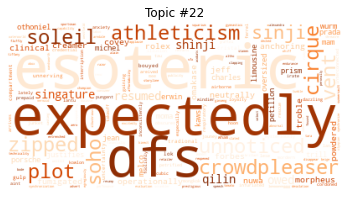

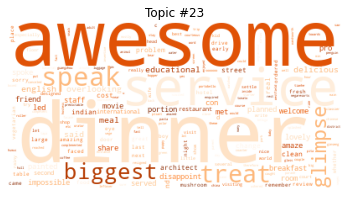

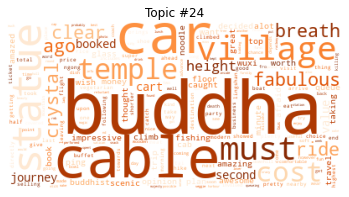

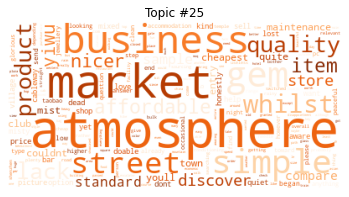

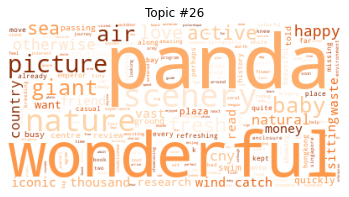

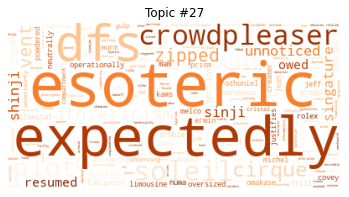

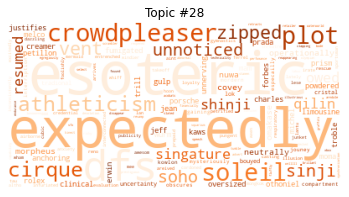

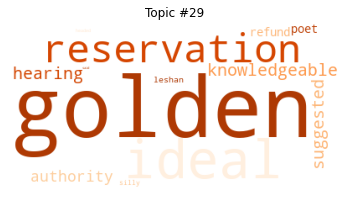

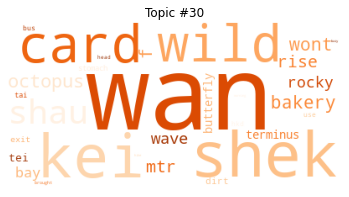

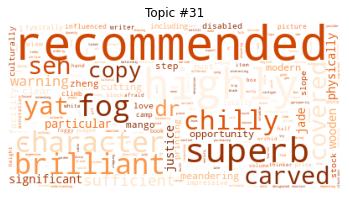

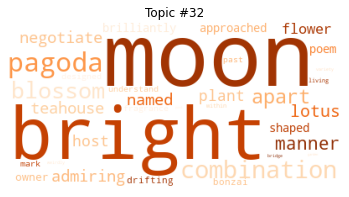

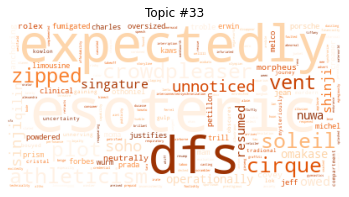

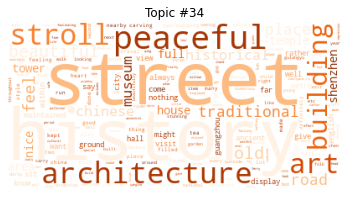

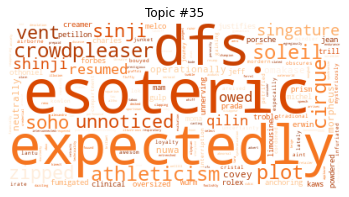

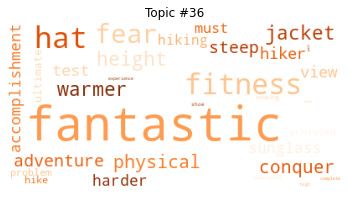

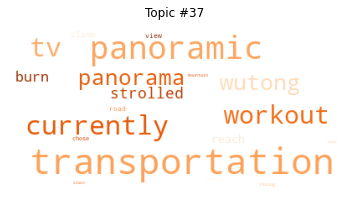

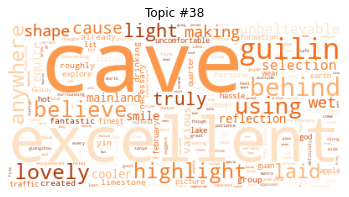

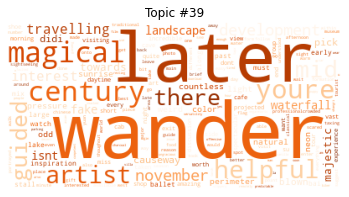

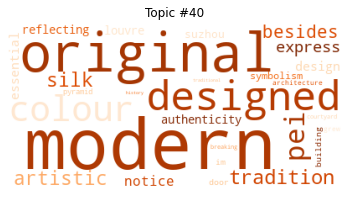

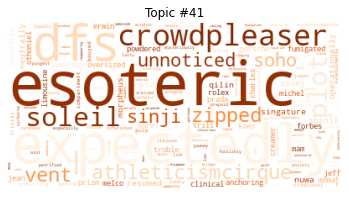

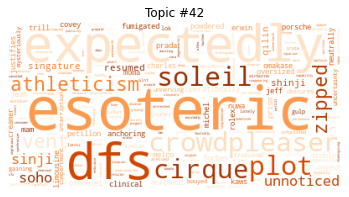

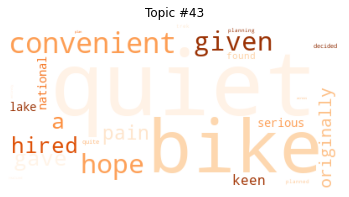

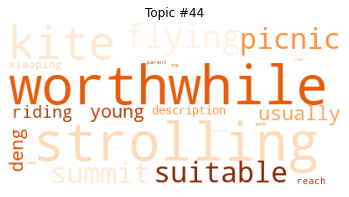

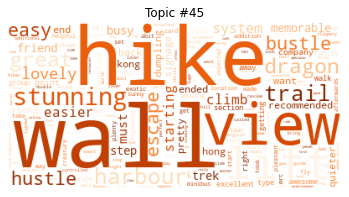

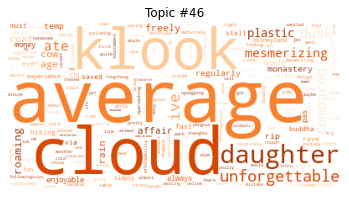

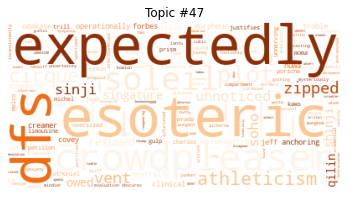

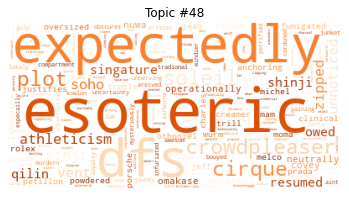

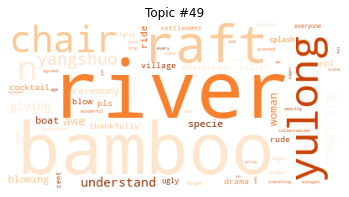

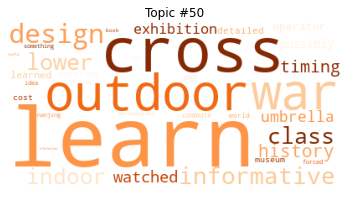

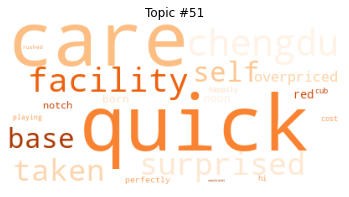

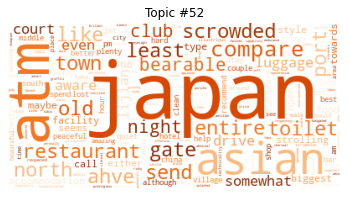

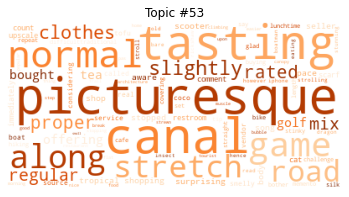

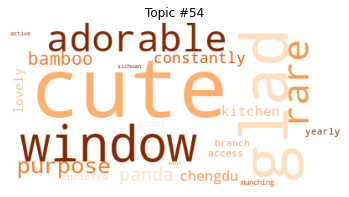

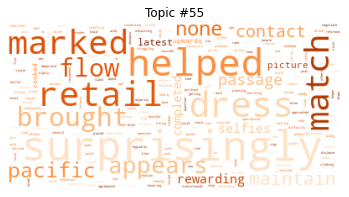

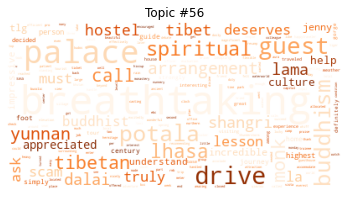

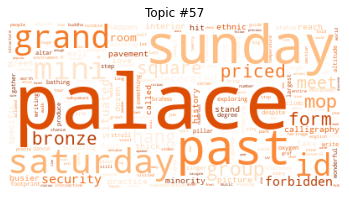

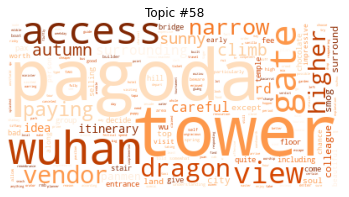

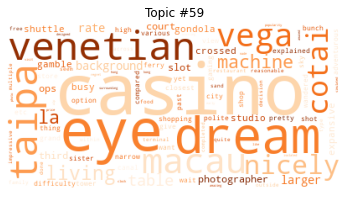

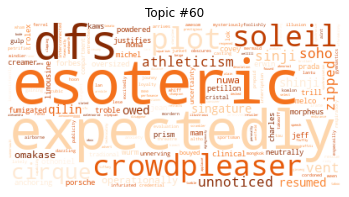

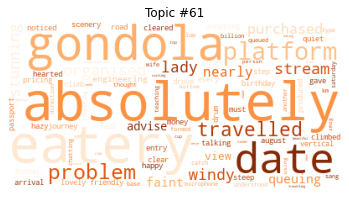

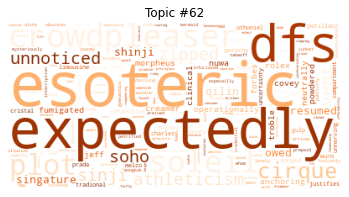

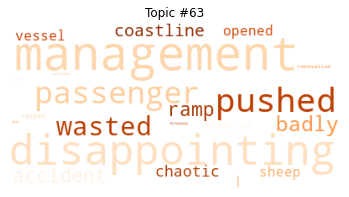

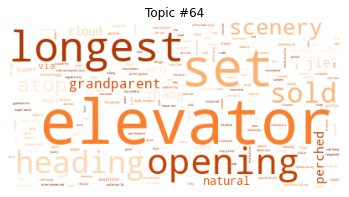

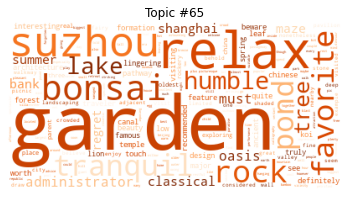

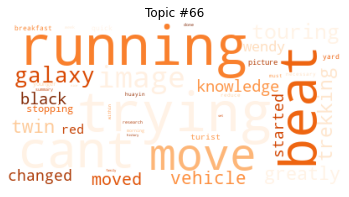

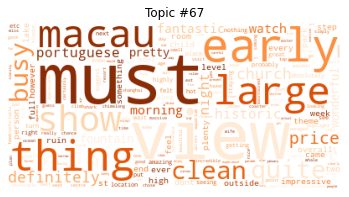

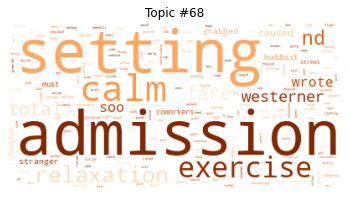

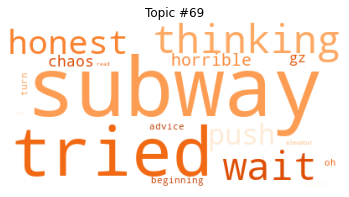

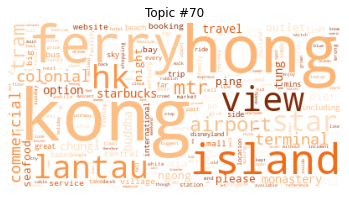

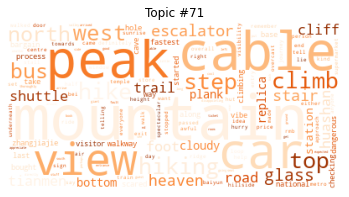

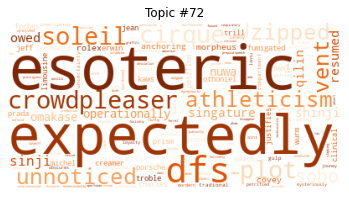

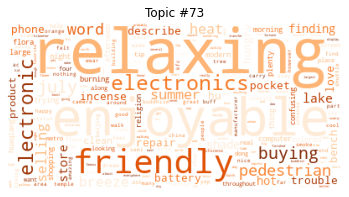

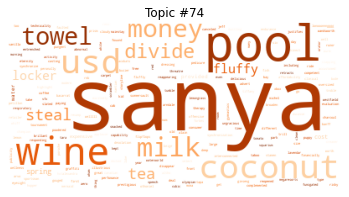

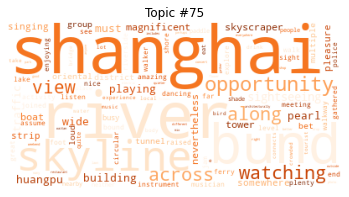

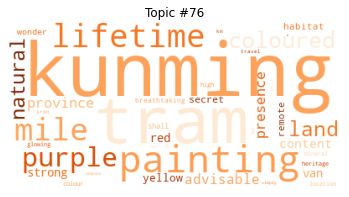

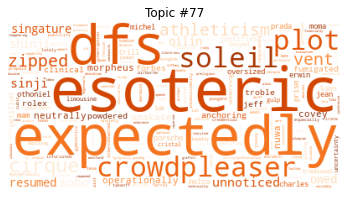

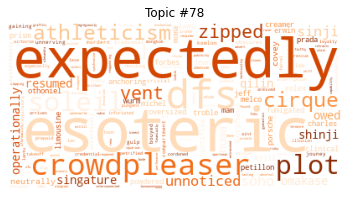

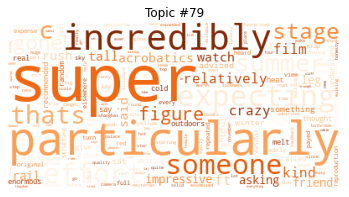

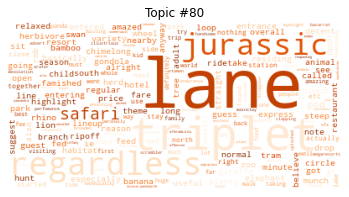

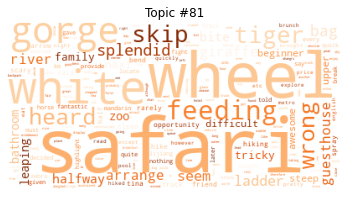

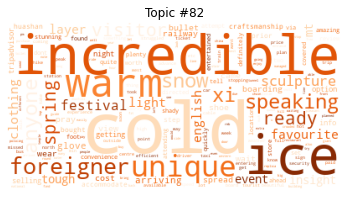

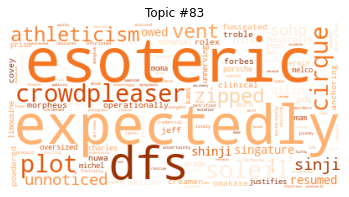

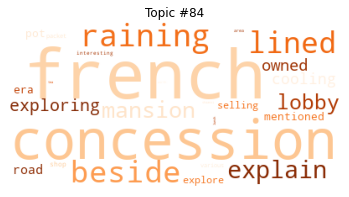

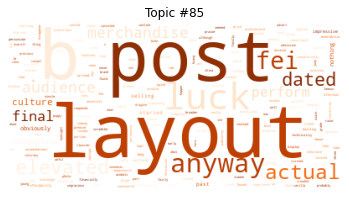

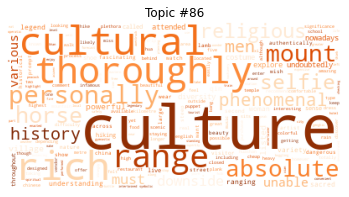

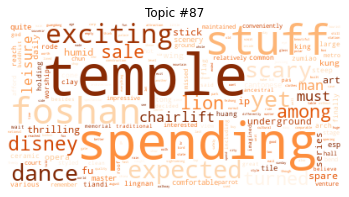

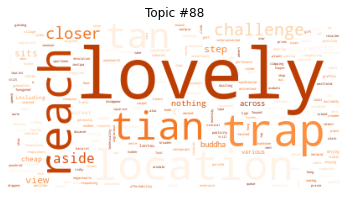

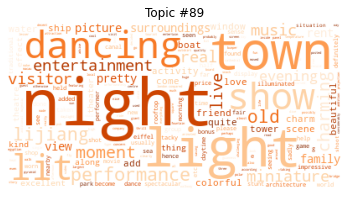

In [192]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

for t in range(lda_model_tfidf.num_topics):
    plt.figure()
    plt.imshow(WordCloud(background_color='white', colormap='Oranges').fit_words(dict(lda_model_tfidf.show_topic(t, 200))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show()

In [193]:
from gensim.test.utils import datapath

lda_model_tfidf.save("Data/Models/China/China")